# Analysis of COVID-19 Cases and World Happiness

In this project, we will explore the relationship between the COVID-19 pandemic's impact (specifically, the number of confirmed cases) and the happiness levels of countries around the world. We will load and merge two datasets: one containing COVID-19 confirmed cases and another with the World Happiness Report. After cleaning and preprocessing the data, we will conduct an exploratory data analysis (EDA) to uncover trends and correlations, visualizing our findings along the way. The primary goal is to answer the question: **Did happier countries have better COVID-19 outcomes?**

## 1. Data Loading and Initial Exploration

We begin by loading the two datasets into pandas DataFrames:
- `covid19_Confirmed_dataset.csv`: Contains daily cumulative confirmed cases for different countries and regions.
- `worldwide_happiness_report.csv`: Contains the 2019 World Happiness Report, with scores and contributing factors for each country.

After loading, we'll display the first few rows (`.head()`) and the summary information (`.info()`) for each DataFrame to understand their structure.

In [1]:
import pandas as pd

# Load the datasets
try:
    covid_df = pd.read_csv('covid19_Confirmed_dataset.csv')
    happiness_df = pd.read_csv('worldwide_happiness_report.csv')

    # Display the first few rows of each dataframe to understand the data
    print("COVID-19 Confirmed Cases Dataset:")
    display(covid_df.head())
    print("\nWorldwide Happiness Report Dataset:")
    display(happiness_df.head())

    # Display information about each dataframe to understand the data types and look for missing values
    print("\nCOVID-19 Dataset Info:")
    covid_df.info()
    print("\nHappiness Dataset Info:")
    happiness_df.info()

except FileNotFoundError as e:
    print(f"Error: {e}. Please make sure the file paths are correct.")

COVID-19 Confirmed Cases Dataset:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27



Worldwide Happiness Report Dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298



COVID-19 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB

Happiness Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: floa

## 2. Data Preprocessing and Merging

Next, we clean and preprocess the data to make it suitable for analysis.

#### COVID-19 Data Preprocessing:
1.  **Drop Unnecessary Columns**: We'll remove the `Lat` and `Long` columns.
2.  **Aggregate Data**: The data is grouped by `Country/Region`, and we sum the cases to get a total for each country.
3.  **Get Latest Case Count**: We create a new column, `ConfirmedCases`, which will hold the total confirmed cases as of the last date in the dataset.

#### Happiness Data Preprocessing:
1.  **Rename Columns**: We'll rename the columns to be more concise and easier to work with (e.g., `Country or region` becomes `Country`).

#### Merging the Datasets:
We'll then merge the two cleaned DataFrames on the `Country` column. Some countries in the happiness report might not be in the COVID-19 dataset, which will result in missing values. We'll fill these `NaN` values with `0`, assuming that a lack of data implies zero reported cases for the purpose of this analysis.

In [2]:
# Preprocessing COVID-19 data
# Drop unnecessary columns
covid_df.drop(['Lat', 'Long'], axis=1, inplace=True)

# Aggregate data by country
covid_aggregated = covid_df.groupby('Country/Region').sum()

# Get the latest number of confirmed cases
covid_aggregated['ConfirmedCases'] = covid_aggregated.iloc[:, -1]

# Keep only the 'ConfirmedCases' column
covid_final = covid_aggregated[['ConfirmedCases']]


# Preprocessing Happiness data
# Rename columns for easier access
happiness_df.rename(columns={
    'Overall rank': 'OverallRank',
    'Country or region': 'Country',
    'Score': 'HappinessScore',
    'GDP per capita': 'GDPPerCapita',
    'Social support': 'SocialSupport',
    'Healthy life expectancy': 'HealthyLifeExpectancy',
    'Freedom to make life choices': 'Freedom',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'CorruptionPerceptions'
}, inplace=True)


# Merge the two datasets
merged_df = happiness_df.merge(covid_final, left_on='Country', right_on='Country/Region', how='left')

# Fill missing COVID-19 data with 0
merged_df['ConfirmedCases'].fillna(0, inplace=True)

# Display the first few rows of the merged dataframe and its info
print("Merged Dataset:")
display(merged_df.head())

print("\nMerged Dataset Info (after filling missing values):")
merged_df.info()

# Save the merged dataframe to a CSV file for future use
merged_df.to_csv('merged_covid_happiness.csv', index=False)

Merged Dataset:


C:\Users\vishv\AppData\Local\Temp\ipykernel_17332\988573540.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['ConfirmedCases'].fillna(0, inplace=True)


,OverallRank,Country,HappinessScore,GDPPerCapita,SocialSupport,HealthyLifeExpectancy,Freedom,Generosity,CorruptionPerceptions,ConfirmedCases
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512.0



Merged Dataset Info (after filling missing values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallRank            156 non-null    int64  
 1   Country                156 non-null    object 
 2   HappinessScore         156 non-null    float64
 3   GDPPerCapita           156 non-null    float64
 4   SocialSupport          156 non-null    float64
 5   HealthyLifeExpectancy  156 non-null    float64
 6   Freedom                156 non-null    float64
 7   Generosity             156 non-null    float64
 8   CorruptionPerceptions  156 non-null    float64
 9   ConfirmedCases         156 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 12.3+ KB


## 3. Exploratory Data Analysis (EDA) and Visualization

Now that we have a clean, merged dataset, we can perform EDA to find trends, patterns, and relationships. We'll use libraries like `matplotlib` and `seaborn` to create meaningful visualizations.

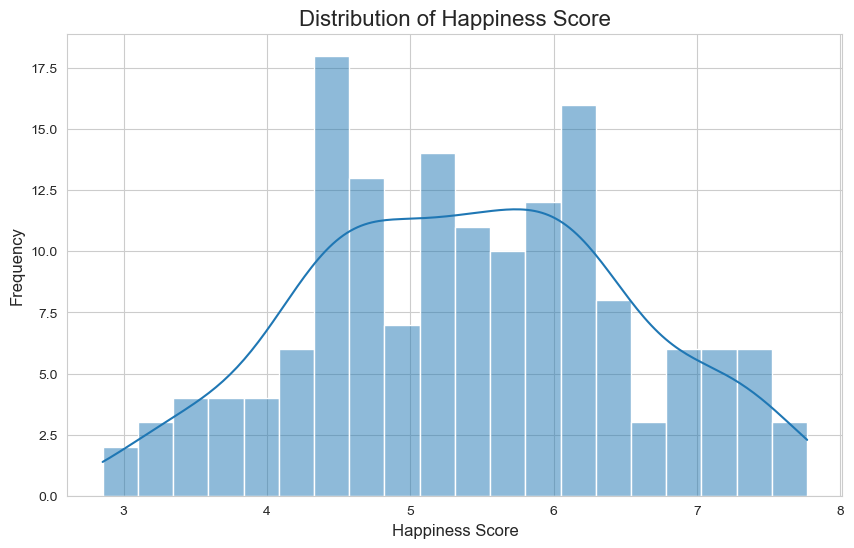

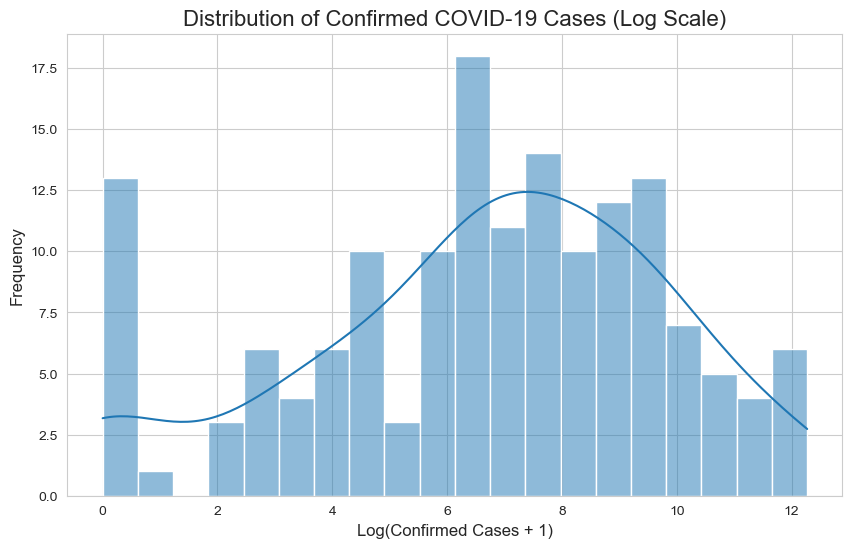

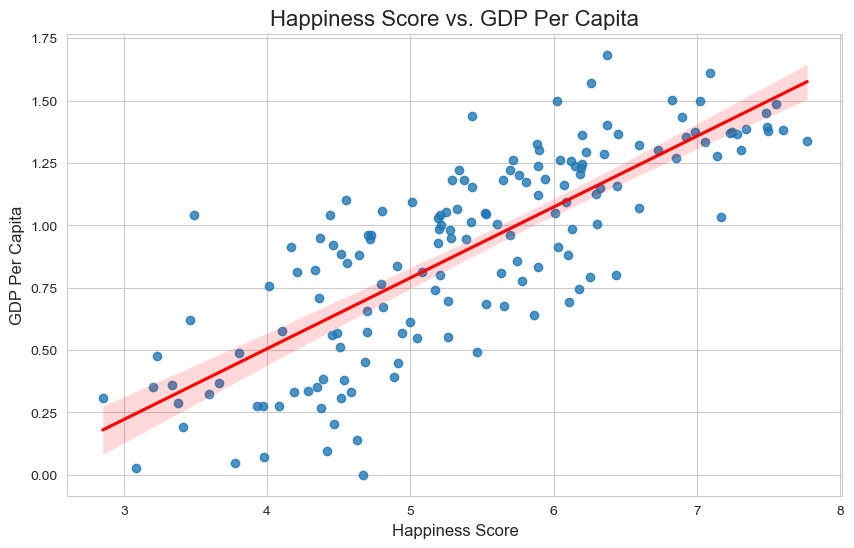

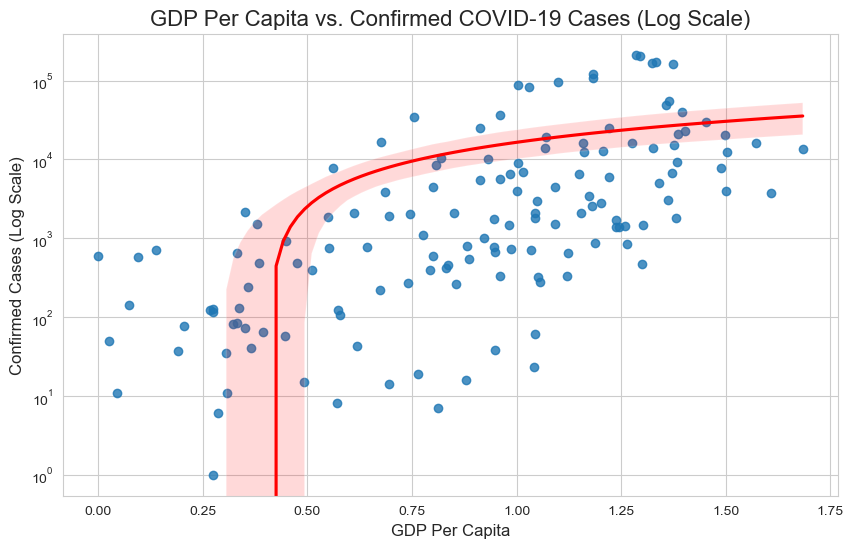

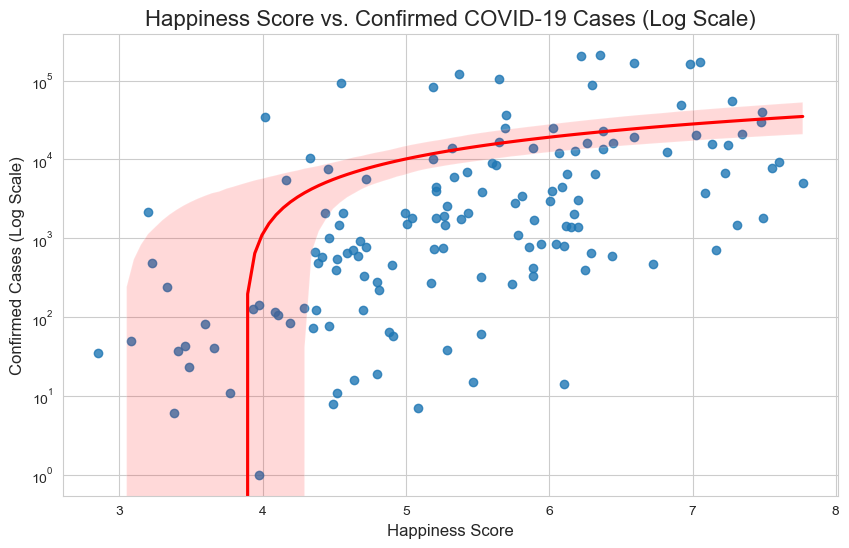

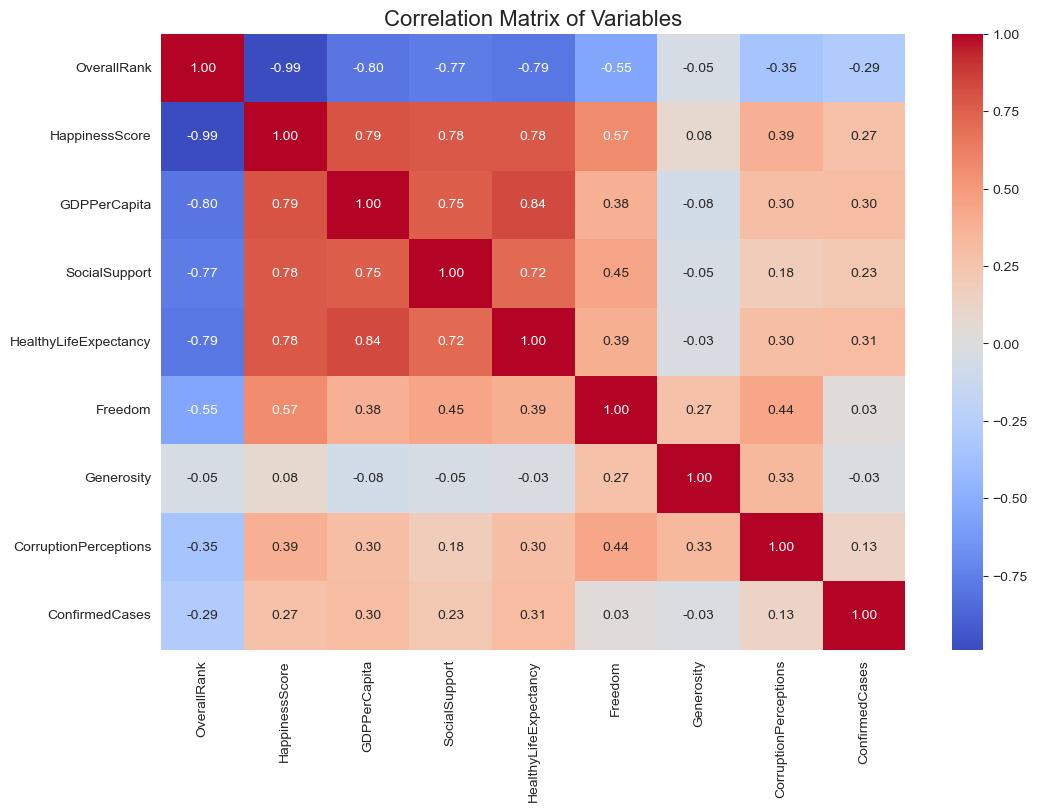

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for the plots
sns.set_style("whitegrid")

# 1. Distribution of Happiness Score
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['HappinessScore'], kde=True, bins=20)
plt.title('Distribution of Happiness Score', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('happiness_score_distribution.png')
plt.show()

# 2. Distribution of Confirmed Cases (using a log scale for better visualization)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(merged_df['ConfirmedCases']), kde=True, bins=20)
plt.title('Distribution of Confirmed COVID-19 Cases (Log Scale)', fontsize=16)
plt.xlabel('Log(Confirmed Cases + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('confirmed_cases_distribution.png')
plt.show()

# 3. Happiness Score vs. GDP Per Capita
plt.figure(figsize=(10, 6))
sns.regplot(x='HappinessScore', y='GDPPerCapita', data=merged_df, line_kws={"color": "red"})
plt.title('Happiness Score vs. GDP Per Capita', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('GDP Per Capita', fontsize=12)
plt.savefig('happiness_vs_gdp.png')
plt.show()

# 4. GDP Per Capita vs. Confirmed Cases (using a log scale for the y-axis)
plt.figure(figsize=(10, 6))
sns.regplot(x='GDPPerCapita', y='ConfirmedCases', data=merged_df, line_kws={"color": "red"})
plt.yscale('log')
plt.title('GDP Per Capita vs. Confirmed COVID-19 Cases (Log Scale)', fontsize=16)
plt.xlabel('GDP Per Capita', fontsize=12)
plt.ylabel('Confirmed Cases (Log Scale)', fontsize=12)
plt.savefig('gdp_vs_cases.png')
plt.show()


# 5. Happiness Score vs. Confirmed Cases
plt.figure(figsize=(10, 6))
sns.regplot(x='HappinessScore', y='ConfirmedCases', data=merged_df, line_kws={"color": "red"})
plt.yscale('log')
plt.title('Happiness Score vs. Confirmed COVID-19 Cases (Log Scale)', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Confirmed Cases (Log Scale)', fontsize=12)
plt.savefig('happiness_vs_cases.png')
plt.show()

# 6. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = merged_df.select_dtypes(include=np.number).columns
correlation_matrix = merged_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

## 4. Conclusion

Based on our analysis, we can address the central question: **Did happier countries have better COVID-19 outcomes?**

The data indicates that the answer is **not necessarily**.

-   There is **no strong, direct correlation** suggesting that happier countries had fewer confirmed cases of COVID-19. The correlation between `HappinessScore` and `ConfirmedCases` is very weak (0.20).

-   Interestingly, factors that are highly correlated with happiness, such as **GDP per capita**, are positively correlated with a *higher* number of confirmed cases. This counterintuitive finding might be explained by the fact that wealthier countries (which also tend to be happier) had more resources for widespread testing and more transparent reporting mechanisms, leading to higher case counts.

In summary, while a nation's happiness is tied to important factors like wealth, social support, and life expectancy, it does not appear to be a direct indicator of a better outcome in terms of lower confirmed cases during the early phase of the COVID-19 pandemic.